**Ch40-41: F1评估_时间序列预测与ARMA**

Source: 
[数据分析实战 45 讲](https://time.geekbang.org/column/intro/100021701?tab=intro)

---

## F1_Score
`sklearn.metrics.f1_score(y_true(*ground truth), y_pred (*prediction))`
当分类结果严重不平衡时（比如罕见病检测、fraud detection）评估模型用“准确率accuracy”（分类正确的/总样本，(TP+TN)/(TO+TN+FN+FP)）是不行的！！！比如全没检测出来，但是TP实在是太少了，最后准确率可能也是99.99%

所以引入精确率**Precision** (P): TP/(TP+FP) 评估所有检测出患病的人（阳性）中真实病人的比例，反映假阳性大小；召回率**Recall** (R): TP/(TP+FN) 评估真实病人中被检测出来的部分，反映假阴性大小。评估两个指标是要避免出现召回率很高（假阴性很少）时实际上假阳性率过高。有：`F1 = 2*(P*R)/(P+R)`

* Confusion matrix: 混淆矩阵/误差矩阵，就是对TP/FP/TN/FN四个数值的矩阵表示。

## 代码块里的一些代码详解

> 锵锵！！！！！下一个代码块是独立写出来的而且第一遍运行就成功了！！好棒的喵！！！！

* `data['Amount']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))`: `reshape(-1,1)` converts a 1D array (the output of `data['Amount'].values`) to 2D to input it into the `fit_tranform()`.
    
    * The `-1` here means that it **automatically calculates** the correct number of rows based on the array length (eg. `[1000]` -> `[[1000,1]]`).

 
* 'Threshold' in precision-recall curve: the cutoff value applied to a classifier's decision scores （详见第二个bullet point); **for SVM that's the distance to the hyperplane; for LogisticRegression that's the probability, recall!!**
    
    *  If score >= threshold, predict class 1; vice versa. (if score = 0: corresponds to probability = 0.5 (the decision boundary, 就是上课讲的情况))
    
    *  `decision_function()` returns the 'score' (raw output, before sigmoid converts it to probability; score > 0, prob > 0.5, predicts class 1)
    
    *  How it affects metrics: **higher threshold, higher precision (fewer false positives), but lower recall (misses more true positives conceivably)**. 具体看我们底下跑出来的曲线，那就是在不同阈值下P和R分别的取值作图

* `itertools.product`用法：去示例代码里找23333。

In [4]:
import pandas as pd
data = pd.read_csv("L40上课数据.csv")
# print(data.info(),"\n",data.head())
# 数据探索后发现：
    # 1. 大多数数据已经过规范化（毕竟是PCA后得到的），只需删掉无关的Time，再对Amount规范化；Class的0/1即为target
    # 2. 这数据集好大，估计得跑上一会儿 (实践证明并没有）

from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

features = data.drop(['Time','Class'],axis=1)
targets = data.Class
train_x,test_x,train_y,test_y = train_test_split(features,targets,test_size=0.3)
pipeline = Pipeline([('ss',StandardScaler()),('logistic',LogisticRegression())])
pipeline.fit(train_x,train_y)   # 像ss的fit_transform(), Pipeline will do fit() from train_x only.
predict_y = pipeline.predict(test_x)
f1 = f1_score(test_y,predict_y)
print(f1)
print(pipeline.score(test_x,test_y))

0.7413127413127413
0.9992158515033414


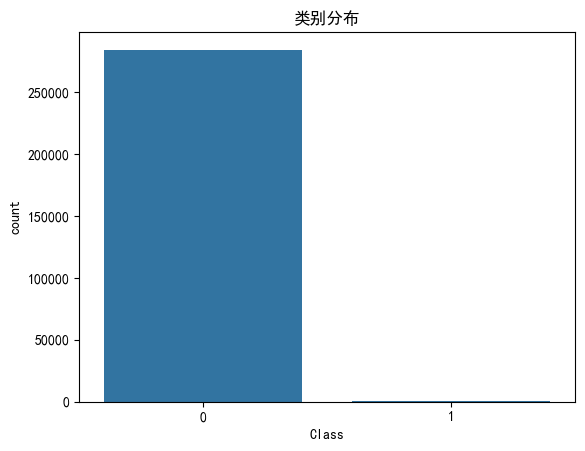

诈骗交易比例:0.001727


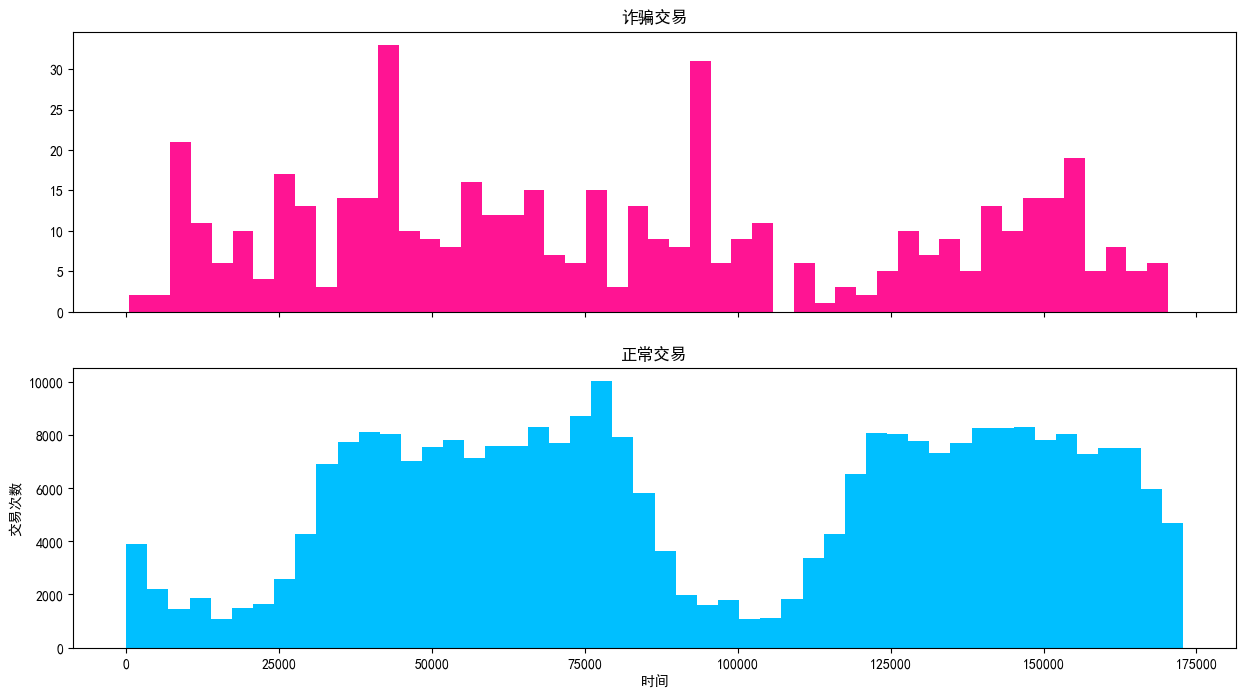

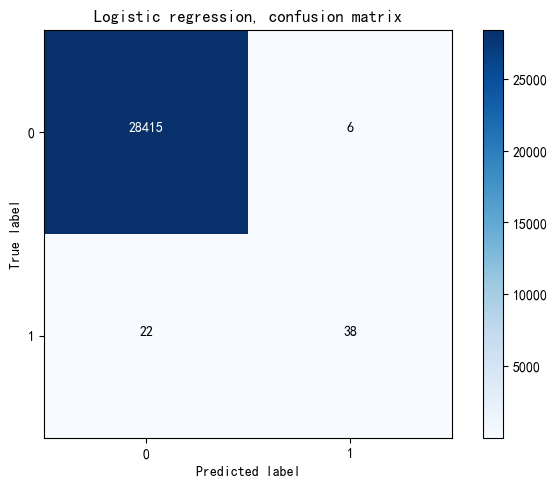

Precision: 0.864
Recall: 0.633
F1 score: 0.731


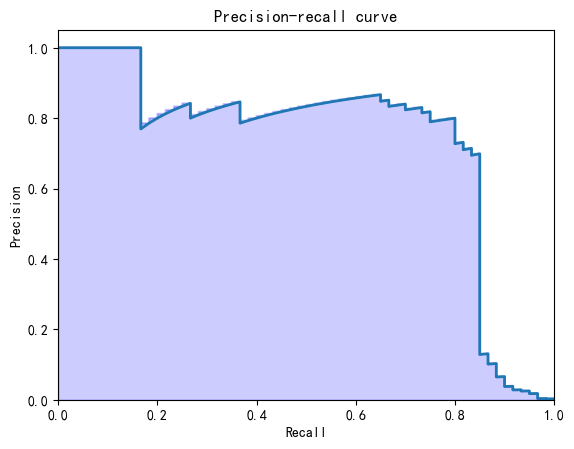

In [6]:
# 下面是老师的示例代码！！！
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.metrics import confusion_matrix, precision_recall_curve
import warnings 
warnings.filterwarnings('ignore')

# Confusion matrix (abbre. 'cm' here) visualization
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=0)
    plt.yticks(tick_marks,classes)
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
            # itertools.product: returns the Cartesian Product of two sets
                    # eg. array1 = [1,2]; array2 = [8,9,10]
                    # Cartesian Product: [(1,8),(1,9),(1,10),(2,8),(2,9),(2,10)] 变成点坐标了
            # 即输出出来是把数列一面的每个**元组**(i,j)遍历一遍
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
# Displaying model evaluation 
def show_metrics(cm):
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print(f'Precision: {tp/(tp+fp):.3f}')
    print(f'Recall: {tp/(tp+fn):.3f}')
    print(f'F1 score: {2*(tp/(tp+fp))*(tp/(tp+fn))/((tp/(tp+fn))+(tp/(tp+fp))):.3f}')
# Plotting precision-recall curve
def plot_curve():
    plt.step(recall,precision,color='b',alpha=0.2,where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.plot(recall,precision,linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-recall curve')
    plt.show()

plt.rcParams['font.sans-serif']=['SimHei']
plt.figure()
ax = sns.countplot(x='Class',data=data)
plt.title("类别分布")
plt.show()
print(f'诈骗交易比例:{len(data[data['Class']==1])/len(data['Class']):.6f}') # 'data['Class'] == 1': a Boolean mask
# i.e., creates a Series of True/False; then used to filter and return only rows with True
f,(ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(15,8))
bins=50
ax1.hist(data.Time[data.Class==1],bins=bins,color='deeppink')  # 同上,一样是Boolean mask (filtering)
ax1.set_title('诈骗交易')
ax2.hist(data.Time[data.Class==0],bins=bins,color='deepskyblue')  
ax2.set_title('正常交易')
plt.xlabel('时间')
plt.ylabel('交易次数')
plt.show()

# 不应该像前一个代码块我那样直接把整个有些列已经scaled过的DataFrame都丢给StandardScaler，会break data consistency:
# "The DataFrame should contain only raw, unscaled data. Never re-fit a scaler on already-scaled features."
data['Amount']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
x=data.drop(['Time','Class'],axis=1)
y=data['Class']
tr_x,te_x,tr_y,te_y=train_test_split(x,y,test_size=0.1,random_state=33)

clf = LogisticRegression()
clf.fit(tr_x,tr_y)
pr_y = clf.predict(te_x)
# 预测样本的置信分数
score_y = clf.decision_function(te_x)

cm = confusion_matrix(te_y,pr_y)
class_names = [0,1]
plot_confusion_matrix(cm,classes=class_names,title='Logistic regression, confusion matrix')
show_metrics(cm)
precision,recall,thresholds = precision_recall_curve(te_y,score_y)
plot_curve()


花费时间：0.7272561669960851s



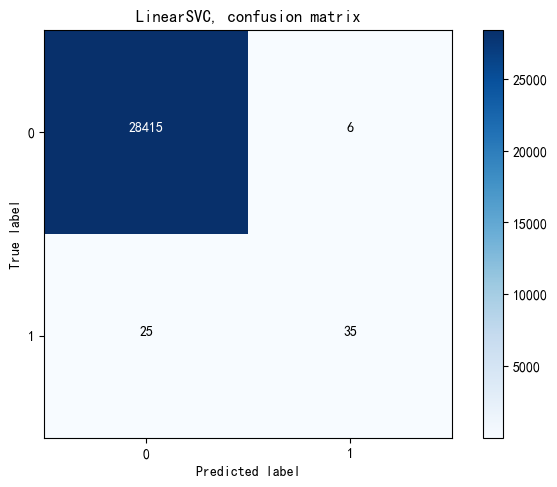

Precision: 0.854
Recall: 0.583
F1 score: 0.693
Accuracy: 0.9989115550718023


In [8]:
# L41 作业
from sklearn.svm import LinearSVC 
import time
svm = LinearSVC()
start_time = time.perf_counter()    
svm.fit(tr_x,tr_y)
pr_y2 = svm.predict(te_x)
end_time = time.perf_counter()
print(f'花费时间：{end_time-start_time}s\n')
cm2 = confusion_matrix(te_y,pr_y2)
class_names = [0,1]
plot_confusion_matrix(cm2,classes=class_names,title='LinearSVC, confusion matrix')
show_metrics(cm2)
print(f'Accuracy: {svm.score(te_x,te_y)}')

# Time Series Forecasting

按照时间顺序排成的数字序列，得到目标变量y与时间这个单一变量的相关性。

* AR: auto regressive, 自回归模型，认为过去若干时刻的点通过线性组合加上白噪声（均值为0方差为常数的纯随机过程）就可以预测未来某个时刻的点

* MA: moving average，滑动平均模型，通过历史白噪声进行线性组合来影响当前时刻点。其实与AR大同小异

* ARMA: auto regressive moving average, 这俩的组合。ARIMA: auto regressive integrated moving average，多了一个对不平稳数据进行差分(differencing)平稳的过程，通过计算相邻观测值的差值消除趋势或季节性。`from statsmodels.tsa.arima.model import ARIMA`。
    
    * 差分具体是干了个什么：eg. 原始序列为\[3,5,8,12]（明显上升趋势），一阶差分完了是\[5-3,8-5,12-8]=\[2,3,4]（趋势减弱），二阶差分完了是\[1,1]（完全平稳）。

在时间序列模型中，“阶数/order”是一个关键**参数**，用于定义模型依赖的历史数据或误差项的**数量**!! 在AR中阶数p就是模型依赖的过去时刻的**观测值数量**，MA的q是过去时刻的白噪声（随机误差）数量，ARMA这俩参数都有，ARIMA还多了一个差分阶数d表示差分的次数，所以参数是三元组(p,d,q)。

## 评估模型

AIC准则，衡量统计模型拟合好坏的标准，数值越*小*代表拟合越好。可以用它来找ARMA的阶数(p,q)取什么的时候模型最优。

## 第一个代码块详解

**1. 居然可以直接这样用pd数据结构画图，好方便**

**Pandas integrates with Matplotlib** to enable direct plotting of Series/DataFrame objects via the `.plot()` method for Series/DataFrame objects. eg. 

```python
data.plot(figsize=(12,8))  # 'data': a Series with datetime index
```

You can use this when:

- Your data is stored in a Pandas Series or DataFrame.

- The index is meaningful for the x-axis (eg. time for time series).

- You want quick visualization without manually handling axis labels and formatting (it does automatically).


**2. `fig, ax = plt.subplots(...)`含义及`.plot(ax=ax)`**

```python
fig, ax = plt.subplots(figsize=(12, 8))  # A.
ax = data.loc['1901':].plot(ax=ax)  # B.
predict_y.plot(ax=ax)   # C.
```
- A.: Creates a figure and axes object for customized plotting.
    
    - `fig`: The **container** for all plot elements.
    
    - `ax`: The **actual plotting area** (eg. x/y axis, labels). then uses the `Series.plot()` method again

- B. `.plot(ax=ax)`: directs Pandas to plot on the existing ax just created (instead of creating a new figure by the `Series.plot()`)

- C. `.plot(ax=ax)` **overlays** the Series for the predicted values on the same `ax`; 跟上述作用一样。

- By reusing axes (`ax=ax`), all data is plotted on a consistent axis.

## 第二个代码块详解

**1. `.subplot(nnn)`中nnn的含义、legend的意思**

看跑出来的图！！比如在

```python
plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label='按季度')
plt.legend()   
# legend就是displays上行通过kwarg 'label='设置的"按季度"小图例，也可以这样设：plt.legend(['按季度'],loc='upper left')
```  
中，'223'就是一共两行两列的第三个喵～～

**2. 更改时间尺度**

`pd.to_datetime()`函数来更改index与`DataFrame.resample('目标时间尺度代表的参数').mean()`方法来统计（降维）

**3. 继续用`itertools.product`，在(p,0,q)三元组而p和q都有可选取值范围时遍历各种元组排列**

本来写的是
```python
p_range = range(0,3)
q_range = range(0,3)
order = itertools.product(p_range,0,q_range)
```
说'int' object is not iterable，改成`(p_range,[0],q_range)`这不就完了嘛。

**4. ARIMA 中的`.predict(start=,end=)`参数**

`best_model.predict(start=0, end=91)`

* `start=0`: start predicting from the first observation in the training data (index position 0). If `start=0`, model will generate in-sample predictions (fitted values) for the **historical period before forecasting future** values. 见下图（红色虚线，把历史记录也预测了一遍哈哈哈哈）

* `end=91`: if the training data has N months (rows), this would forecast (91+1-N) additional months/**rows**, matching the future_dates list.


## 作业题

整体还是不错的一次也就跑出来了！！画图我觉着也掌握得好些了！

就是在预测未来**前**需要索引扩展及扩展方式，快去再看看代码块！！

90 
 <class 'list'> [datetime.datetime(1901, 12, 31, 0, 0), datetime.datetime(1902, 12, 31, 0, 0), datetime.datetime(1903, 12, 31, 0, 0), datetime.datetime(1904, 12, 31, 0, 0), datetime.datetime(1905, 12, 31, 0, 0)]
0    5922
1    5308
2    5546
3    5975
dtype: int64 RangeIndex(start=0, stop=90, step=1)
1901-12-31    5922
1902-12-31    5308
1903-12-31    5546
1904-12-31    5975
dtype: int64


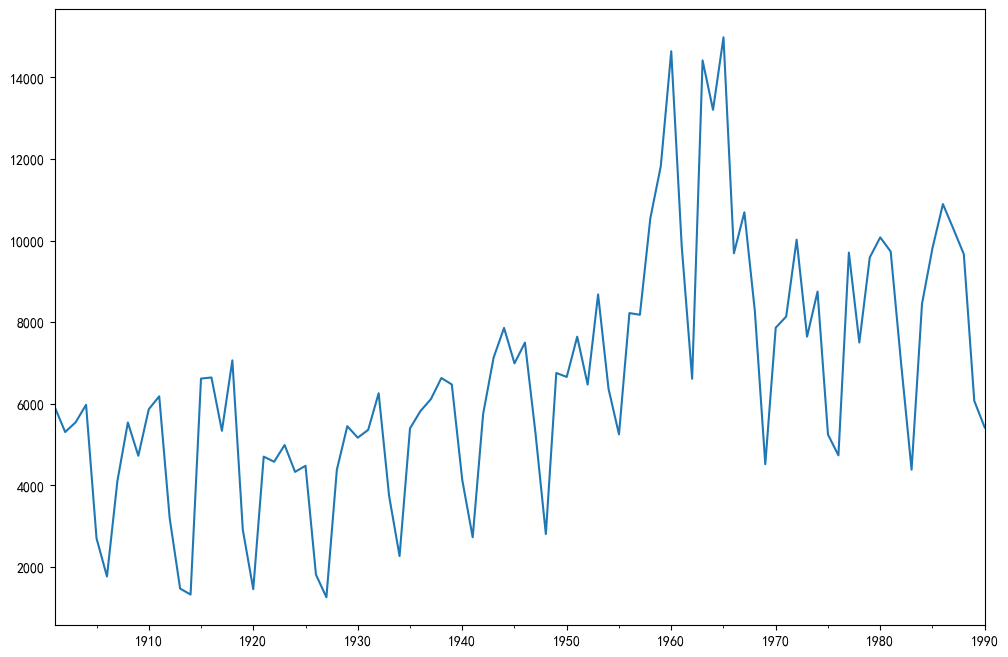

AIC:  1619.6834740283655


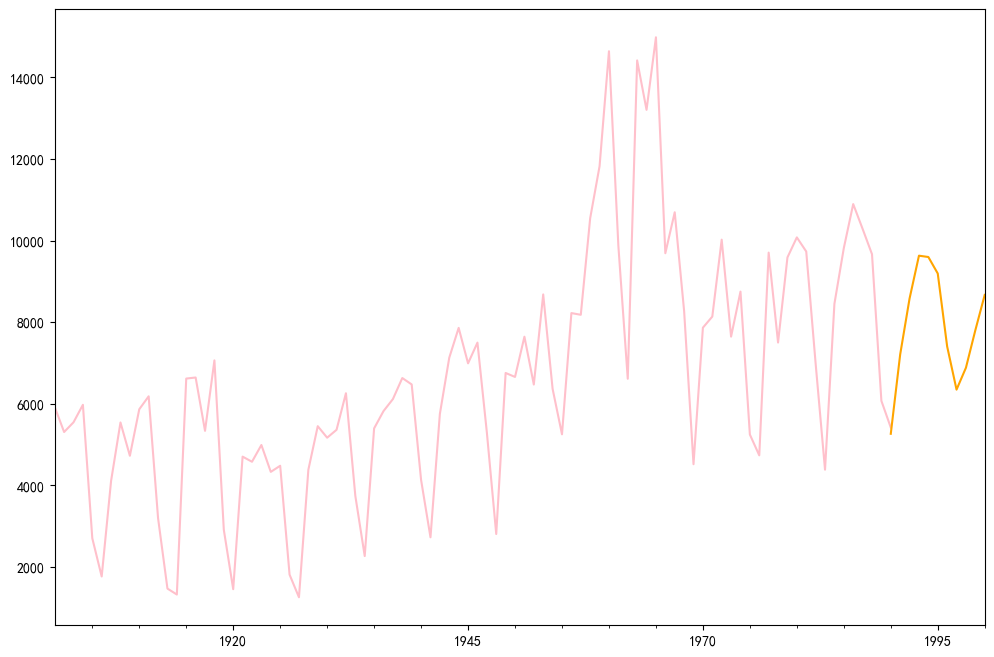

In [11]:
# 先随便整点数据试试
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # 没中间红的那几行了，爽了

data = [5922, 5308, 5546, 5975, 2704, 1767, 4111, 5542, 4726, 5866, 6183, 3199, 1471, 1325, 6618, 6644, 5337, 7064, 2912, 1456, 4705, 4579, 4990, 4331, 4481, 1813, 1258, 4383, 5451, 5169, 5362, 6259, 3743, 2268, 5397, 5821, 6115, 6631, 6474, 4134, 2728, 5753, 7130, 7860, 6991, 7499, 5301, 2808, 6755, 6658, 7644, 6472, 8680, 6366, 5252, 8223, 8181, 10548, 11823, 14640, 9873, 6613, 14415, 13204, 14982, 9690, 10693, 8276, 4519, 7865, 8137, 10022, 7646, 8749, 5246, 4736, 9705, 7501, 9587, 10078, 9732, 6986, 4385, 8451, 9815, 10894, 10287, 9666, 6072, 5418]
data = pd.Series(data)
data_index = sm.tsa.datetools.dates_from_range('1901','1990')
print(len(data),'\n',type(data_index),data_index[:5])
print(data[:4],data.index)
data.index = pd.Index(data_index)  # 看这个index在Index()函数后如何变化！
print(data[:4])

data.plot(figsize=(12,8))
plt.show()

arima = ARIMA(endog=data,order=(7,0,0)).fit() 
# (7,0,0)是我们设的阶数(参数) (p,d,q) d为0即我们不进行差分，q为0即不依赖历史白噪声变化
print("AIC: ",arima.aic)

predict_y = arima.predict('1990','2000')
fig, ax = plt.subplots(figsize=(12,8))
ax = data.loc['1901':].plot(ax=ax,color='pink')
predict_y.plot(ax=ax,color='orange')  # 随便设颜色，区分一下，虽然好丑
plt.show()


    Timestamp      Open      High       Low     Close  Volume_(BTC)  \
0  2011/12/31  4.465000  4.482500  4.465000  4.482500     23.829470   
1    2012/1/1  4.806667  4.806667  4.806667  4.806667      7.200667   
2    2012/1/2  5.000000  5.000000  5.000000  5.000000     19.048000   
3    2012/1/3  5.252500  5.252500  5.252500  5.252500     11.004660   
4    2012/1/4  5.200000  5.223333  5.200000  5.223333     11.914807   

   Volume_(Currency)  Weighted_Price  
0         106.330084        4.471603  
1          35.259720        4.806667  
2          95.240000        5.000000  
3          58.100651        5.252500  
4          63.119577        5.208159  


Index设置后: 
                 Open      High       Low     Close  Volume_(BTC)  \
Timestamp                                                          
2011-12-31  4.465000  4.482500  4.465000  4.482500     23.829470   
2012-01-01  4.806667  4.806667  4.806667  4.806667      7.200667   
2012-01-02  5.000000  5.000000  5.000000  5.000000   

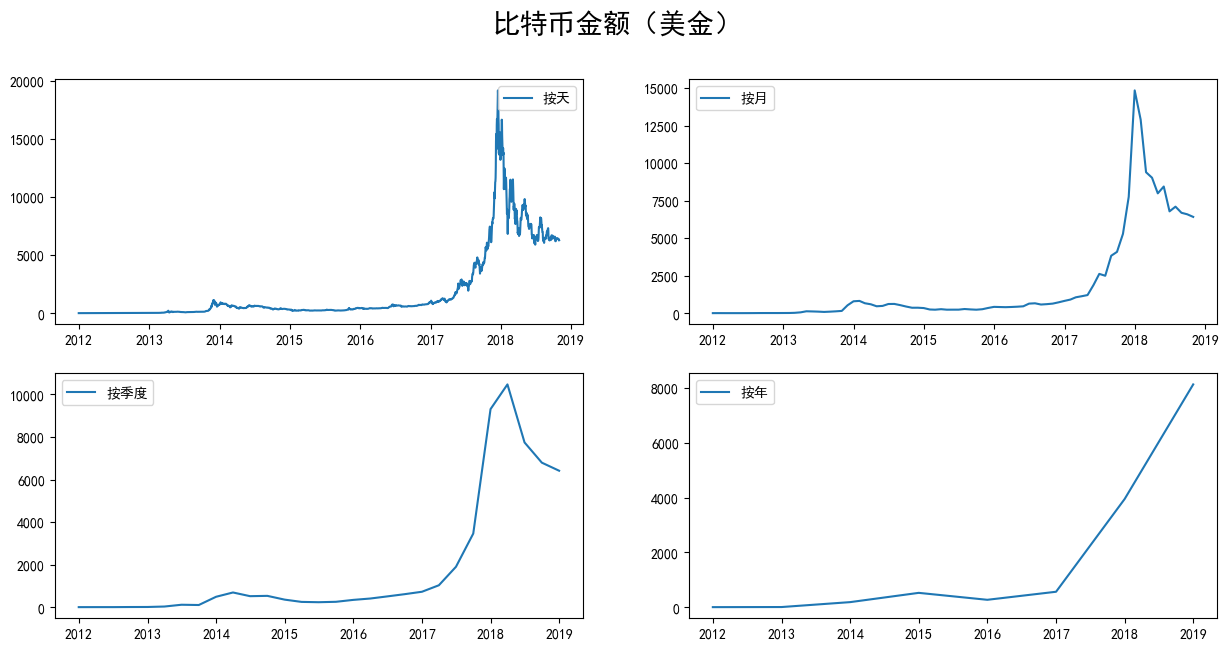

<class 'itertools.product'>
[(0, 0, 0), (0, 0, 1), (0, 0, 2), (1, 0, 0), (1, 0, 1), (1, 0, 2), (2, 0, 0), (2, 0, 1), (2, 0, 2)]


最优模型:                                 SARIMAX Results                                
Dep. Variable:         Weighted_Price   No. Observations:                   83
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -688.783
Date:                Fri, 04 Apr 2025   AIC                           1385.566
Time:                        12:56:15   BIC                           1395.242
Sample:                    12-31-2011   HQIC                          1389.453
                         - 10-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1772.9960   4642.198      0.382      0.703   -7325.544    1.0

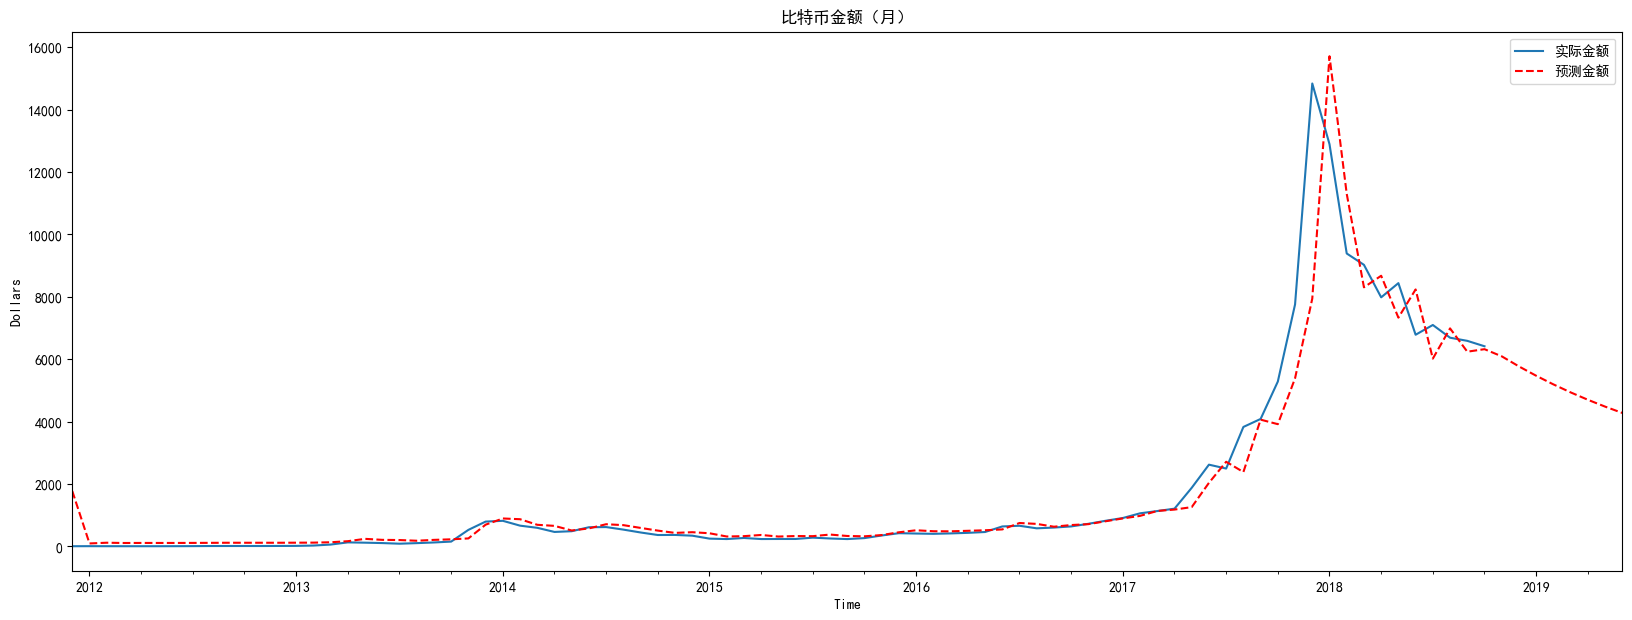

In [13]:
from datetime import datetime

df = pd.read_csv("L41上课数据.csv")
print(df.head())

# set time as the index of df
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.index = df['Timestamp']
df.drop(['Timestamp'],axis=1,inplace=True)
print("\n\nIndex设置后: \n",df.head())

# 对于目前这个预测任务，我们只关心Weighted_Price那一个属性

# 可以看到现在的时间尺度是天；我们再选择其他尺度看看走势（为了之后进行数据降维）
# 分别是月、季度、年的统计与可视化
df_monthly = df.resample('M').mean()  #注意看resample方法及其参数
df_seasonal = df.resample('Q-DEC').mean()
df_annual = df.resample('A-DEC').mean()
fig = plt.figure(figsize=[15,7])  # 仍然是容器喵
plt.rcParams['font.sans-serif']=['SimHei']
plt.suptitle('比特币金额（美金）', fontsize=20)

plt.subplot(221)
plt.plot(df.Weighted_Price, '-', label='按天')
plt.legend()

plt.subplot(222)
plt.plot(df_monthly.Weighted_Price, '-', label='按月')
plt.legend()

plt.subplot(223)
plt.plot(df_seasonal.Weighted_Price, '-', label='按季度')
plt.legend()

plt.subplot(224)
plt.plot(df_annual.Weighted_Price, '-', label='按年')
plt.legend()

plt.show()


# set range for potential ARIMA parameters (p,0,q), itertools.product utilized!!!
p_range = range(0,3)
q_range = range(0,3)
order = itertools.product(p_range,[0],q_range)  
print(type(order))
order_list = list(order)
print(order_list)
# find the best parameter tuple for ARIMA (that is, minimizing AIC)  我们这里使用时间尺度按月的。已经降维了
best_aic = float('inf')  # 正无穷
results = []
for o in order_list:
    try:
        model = ARIMA(endog=df_monthly.Weighted_Price,order=o).fit()
    except ValueError:
        print('参数错误 ',o)
        continue
    aic = model.aic
    if aic <= best_aic:
        best_model = model
        best_aic = aic
        best_order = o
    results.append([o,aic])   # 所以results得在循环外部接受**不断迭代/更新的变量**

# 输出最优模型
table = pd.DataFrame(results)
table.columns = ['Order','AIC']
print('\n\n最优模型: ',best_model.summary(),"\n\n")  # ARIMA对象的summary()方法
# 本来想说看上去ARIMA对象是一个不可变对象，要不然可以在循环后面取出来用，一想可变不可变只对函数传参过后变不变而言，什么脑子

# 预测
future_dates = [datetime(2018, 11, 30), datetime(2018, 12, 31), datetime(2019, 1, 31), datetime(2019, 2, 28), datetime(2019, 3, 31), datetime(2019, 4, 30), datetime(2019, 5, 31), datetime(2019, 6, 30)]
# 按月的话默认datatime为每月最后一天
future = pd.DataFrame(index=future_dates,columns=df_monthly.columns)
df_monthly2 = pd.concat([df_monthly.Weighted_Price,future])
df_monthly2['Forecast'] = best_model.predict(start=0,end=91)
plt.figure(figsize=(20,7))
df_monthly2['Weighted_Price'].plot()
df_monthly2['Forecast'].plot(color='r',ls='--')
plt.legend(['实际金额','预测金额'])
plt.title('比特币金额（月）')
plt.xlabel('Time')
plt.ylabel('Dollars')
plt.show()
                                             

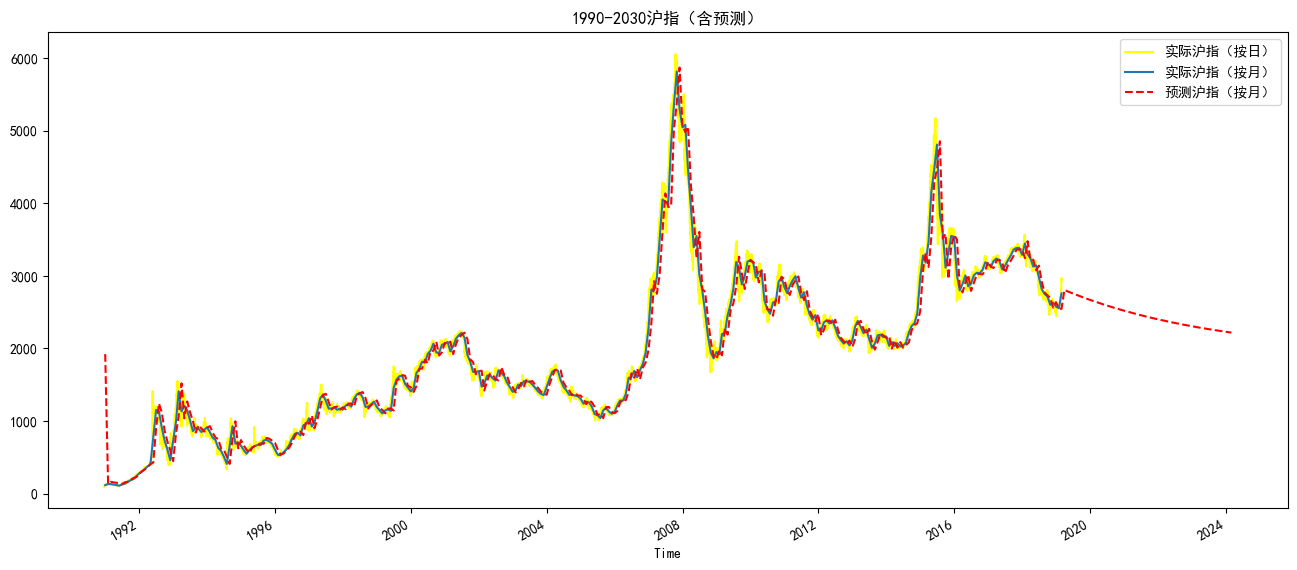

In [37]:
# 作业题，自己写的，居然跑了一次就跑出来了T_T，就是预测的后五年的图上显示不出来，一开始的预测曲线还有一个竖线
            # 原因：预测范围未正确对齐时间索引；hw_monthly['Forecast_price'].plot() 默认只绘制已有索引的数据
            # 现在是加入reindex步骤的
hw = pd.read_csv("L41作业数据.csv")
hw.Timestamp = pd.to_datetime(hw.Timestamp)
hw.index = hw.Timestamp
hw.drop(['Timestamp'],axis=1,inplace=True)
hw_monthly = hw.resample('M').mean()
hw_model = ARIMA(endog=hw_monthly.Price,order=best_order).fit()  # 刚才已经跑出来best_order为(1,0,1)了

# 扩展索引到未来60个月
future_dates = pd.date_range(start=hw_monthly.index[-1], periods=61, freq='M')[1:] # 避免重复最后一个月(:1)
# 现在这个future_dates的type就为：<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
# 所以不能通过DataFrame或者Series的方式接上原DataFrame的index，可以直接用如下：
hw_monthly = hw_monthly.reindex(hw_monthly.index.union(future_dates))
# 索引扩展好了（Price列之后行为空）才能predict！！！要不然你在这步之前predict了也没地方塞新行啊

hw_monthly['Forecast_price'] = hw_model.predict(start=0,end=(len(hw_monthly.index)+60))

plt.figure(figsize=(16,7))
hw['Price'].plot(color='yellow')
hw_monthly['Price'].plot()
hw_monthly['Forecast_price'].plot(color='r',ls='--')
plt.legend(['实际沪指（按日）','实际沪指（按月）','预测沪指（按月）'])
plt.title('1990-2030沪指（含预测）')
plt.xlabel('Time')
plt.show()